In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [2]:
def show_img(img):
    plt.style.use('dark_background')
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def convert_BGR2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [4]:
def floodfill(img, seed=(0, 0), loDiff=40, upDiff=30):

    copyimg = img.copy()
    copyimg2 = img.copy()
    h, w = img.shape[:2]
    mask = np.zeros([h+2, w+2], np.uint8) 
    cv2.floodFill(copyimg, mask, seed, (0, 255, 255), (loDiff, loDiff, loDiff), (upDiff, upDiff, upDiff), cv2.FLOODFILL_FIXED_RANGE)  
    print("floodFill (for demo show):")
    show_img(copyimg)
    
    mask = np.zeros([h+2, w+2], np.uint8)
    cv2.floodFill(copyimg2, mask, seed, (0, 0, 0), (loDiff, loDiff, loDiff), (upDiff, upDiff, upDiff), cv2.FLOODFILL_FIXED_RANGE)  
    print("floodFill (for crop):")
    show_img(copyimg2)

    # Now create a mask of logo and create its inverse mask also
    img2gray = cv2.cvtColor(copyimg2,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 1, 255, cv2.THRESH_BINARY)
    
    print("mask (人白，黑背景):")
    show_img(mask)
    mask2 = mask
    
    roi = mask2[400:550, 950:w] # roi_y, roi_x
    roi[np.where(roi > 254)] = 0
    mask2[400:550, 950:w] = roi
    
    print("手動去不要的部分:")
    show_img(mask2)
    
    print("mask (人黑，白背景):")
    mask_inv = cv2.bitwise_not(mask2)
    show_img(mask_inv)
    
    
    # 展示全部結果

    titles = ['Origin picture', 'floodFill (for demo show)','floodFill (for crop)', 
              'mask (black background)', 'delete some noise','mask (write background)']

    images = [img, copyimg, copyimg2, 
              mask, mask2, mask_inv]

    plt.figure(figsize=(15,8)) 
    h = 2
    w = 3
    for i in range(h):        
        plt.subplot(h,w,i*w+1)
        plt.imshow(convert_BGR2RGB(images[i*w]))
        plt.title(titles[i*w]) 
        
        plt.subplot(h,w,i*w+2)
        plt.imshow(convert_BGR2RGB(images[i*w+1]))
        plt.title(titles[i*w+1]) 
        
        plt.subplot(h,w,i*w+3)
        plt.imshow(convert_BGR2RGB(images[i*w+2]))
        plt.title(titles[i*w+2]) 
               
    plt.show()




In [5]:
def img_processing(img):
    floodfill(img, seed=(0, 0), loDiff=40, upDiff=30)


Origin image:


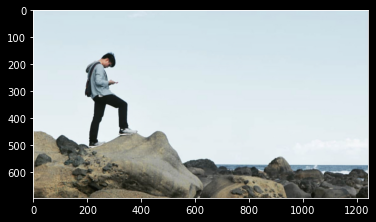

floodFill (for demo show):


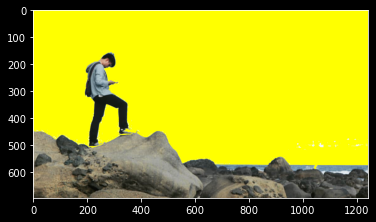

floodFill (for crop):


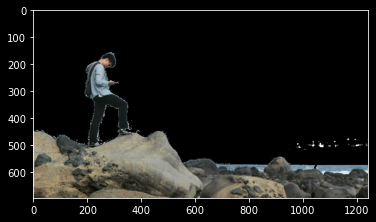

mask (人白，黑背景):


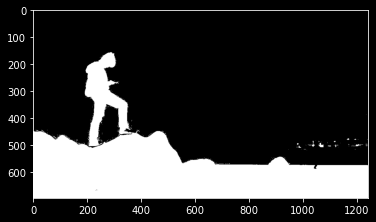

手動去不要的部分:


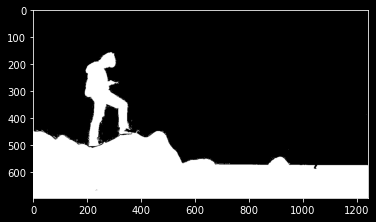

mask (人黑，白背景):


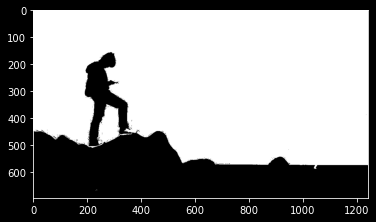

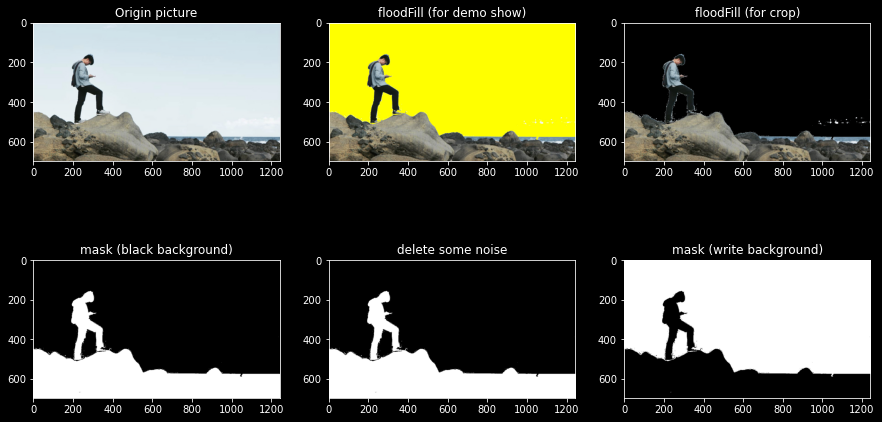

In [6]:
file_name = "./testdata/outcrop.jpg"
origin_img = cv2.imread(file_name)
print("Origin image:")
show_img(origin_img)

img_processing(origin_img)

# Reference

https://www.cnblogs.com/youmuchen/p/7450049.html

https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html

https://blog.csdn.net/weixin_42508025/article/details/84029054?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

https://blog.csdn.net/E01114255/article/details/76186656?utm_source=blogxgwz4&utm_medium=distribute.pc_relevant.none-task-blog-title-9&spm=1001.2101.3001.4242

https://www.itread01.com/content/1537189082.html